In [2]:
import torch
import numpy
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [8]:
x_train, y_train=make_blobs(n_samples=800, n_features=2, centers=[[1,1],[-1,1],[-1,-1],[1,-1]], shuffle=True, cluster_std=0.3)
x_test, y_test=make_blobs(n_samples=200, n_features=2, centers=[[1,1],[-1,1],[-1,-1],[1,-1]], shuffle=True, cluster_std=0.3)

In [9]:
x_train

array([[ 0.70127504, -0.83490734],
       [ 1.28883003, -0.62401617],
       [-1.50668894,  0.69736864],
       ...,
       [-0.86874785, -0.47699464],
       [-0.50886898,  0.73524107],
       [-0.86442264, -0.94555848]])

In [10]:
y_train

array([3, 3, 1, 1, 1, 3, 0, 3, 0, 1, 0, 3, 2, 1, 1, 1, 0, 2, 1, 0, 0, 2,
       1, 3, 3, 1, 2, 1, 3, 1, 3, 3, 0, 2, 2, 2, 0, 1, 0, 3, 3, 2, 3, 1,
       3, 0, 3, 1, 2, 1, 1, 1, 1, 0, 0, 1, 2, 1, 2, 0, 0, 3, 0, 1, 1, 0,
       2, 1, 3, 2, 0, 3, 3, 1, 1, 1, 2, 3, 3, 3, 2, 0, 0, 1, 2, 3, 0, 3,
       1, 1, 0, 1, 3, 0, 1, 1, 3, 2, 0, 0, 1, 1, 1, 0, 1, 2, 0, 2, 2, 0,
       2, 3, 1, 2, 0, 1, 3, 3, 3, 3, 0, 2, 2, 0, 2, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 0, 0, 1, 2, 0, 0, 3, 0, 1, 0, 0, 2, 0, 1, 0, 2, 1, 3, 0, 1,
       0, 2, 3, 2, 2, 2, 0, 3, 3, 0, 1, 2, 1, 1, 0, 1, 0, 0, 1, 1, 1, 3,
       1, 2, 2, 0, 1, 3, 1, 1, 3, 1, 2, 2, 3, 0, 1, 3, 3, 1, 1, 0, 2, 2,
       2, 0, 3, 3, 3, 1, 2, 1, 2, 3, 3, 3, 1, 2, 2, 3, 2, 3, 2, 1, 3, 2,
       1, 2, 2, 0, 0, 1, 1, 0, 3, 0, 0, 3, 1, 0, 1, 3, 2, 2, 3, 3, 2, 1,
       2, 2, 2, 3, 0, 2, 2, 3, 1, 1, 3, 1, 3, 0, 2, 2, 1, 0, 2, 3, 2, 3,
       0, 0, 1, 0, 0, 3, 2, 2, 3, 2, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 3, 3,
       3, 3, 2, 1, 3, 3, 3, 1, 1, 1, 0, 2, 0, 0, 3,

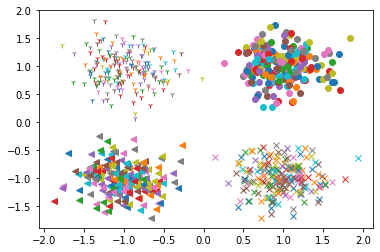

In [15]:
def visualize_dots(x, y = None, c='r'):
    if y is None:
        y=[None]*len(x)
    for x_, y_ in zip(x, y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*', markerfacecolor='none', markeredgecolor=c)
        else:
            if y_==0:
                plt.plot(x_[0], x_[1], 'o')
            elif (y_==1):
                plt.plot(x_[0], x_[1], '1')
            elif (y_==2):
                plt.plot(x_[0], x_[1], '<')
            else:
                plt.plot(x_[0], x_[1], 'x')
plt.figure()
visualize_dots(x_train, y_train, c='r')
plt.show()

In [16]:
x_train=torch.FloatTensor(x_train)
y_train=torch.FloatTensor(y_train)
x_test=torch.FloatTensor(x_test)
y_test=torch.FloatTensor(y_test)

In [21]:
class NeuralNet(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.input_size=input_size
        self.hidden_size=hidden_size
        self.linear_1=torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu=torch.nn.ReLU()
        self.linear_2=torch.nn.Linear(self.hidden_size,1)
        self.sigmoid=torch.nn.Sigmoid()
    
    def forward(self, input_tensor):
        linear1=self.linear_1(input_tensor)
        relu=self.relu(linear1)
        linear2=self.linear_2(relu)
        output=self.sigmoid(linear2)
        return output

In [22]:
model=NeuralNet(2,5)
lr=0.03
loss=torch.nn.BCELoss()
epochs=2000
optimizer=torch.optim.SGD(model.parameters(), lr=lr)

In [25]:
model.eval()
test_loss_bef_train=loss(model(x_test).squeeze(), y_test)
print("test loss before training: ", test_loss_bef_train.item())

test loss before training:  0.973136842250824
